In [1]:
from detrac import Detrac
import torch
import torchvision
from PIL import ImageDraw

In [2]:
dataset = Detrac(r'D:\dataset\UA-DETRAC\Detrac_dataset','train',imgformat='jpg')

In [3]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=960x540 at 0x20526279BA8>,
 {'boxes': tensor([[592., 378., 752., 540.],
          [557., 120., 604., 163.],
          [545.,  88., 580., 118.],
          [508.,  67., 536.,  92.],
          [553.,  70., 582.,  89.],
          [731., 114., 783., 153.],
          [902., 250., 960., 357.]]),
  'labels': tensor([0., 0., 0., 0., 0., 0., 0.]),
  'area': tensor([25920.,  2021.,  1050.,   700.,   551.,  2028.,  6206.]),
  'iscrowd': tensor([0, 0, 0, 0, 0, 0, 0]),
  'image_id': tensor([0])})

In [24]:
def getbbox(objects):
    bbox = list()
    islist = type(objects) == list
    if islist:
        for obj in objects:
            bndbox = obj['bndbox']
            xmin = int(bndbox['xmin'])
            ymin = int(bndbox['ymin'])
            xmax = int(bndbox['xmax'])
            ymax = int(bndbox['ymax'])
            box = [xmin, ymin, xmax, ymax]
            bbox.append(box)
    else:
        bndbox = objects['bndbox']
        xmin = int(bndbox['xmin'])
        ymin = int(bndbox['ymin'])
        xmax = int(bndbox['xmax'])
        ymax = int(bndbox['ymax'])
        box = [xmin, ymin, xmax, ymax]
        bbox.append(box)
    return torch.tensor(bbox)


def drawbbox(img, bboxes):
    if not img or len(bboxes) == 0:
        return
    draw = ImageDraw.Draw(img)
    for item in bboxes:
        draw.rectangle(item.tolist(), outline='red', width=3)
    display(img) #work for IPython
    #img.show()


def showgt(imgtuple):
    img = imgtuple[0]
    bboxes = getbbox(imgtuple[1]['annotation']['object'])
    drawbbox(img, bboxes)

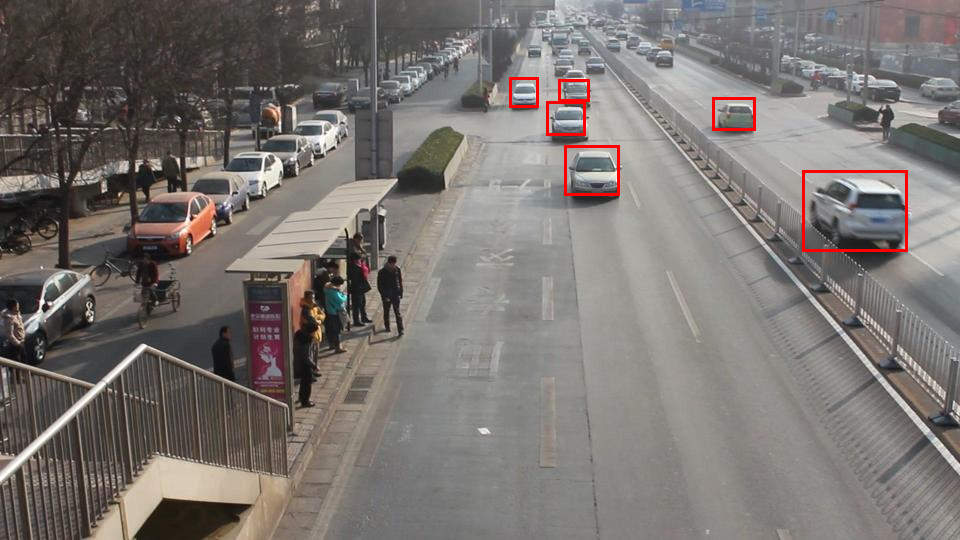

In [16]:
showgt(dataset[12])